<div style="background-color: #28a745 !important; color: white; min-height: 50px; padding: 10px; margin: auto;">
    <p style="text-align: right; font-style: italic">STMKGxHMGI Long Course</p>
    <h1>Sesi: Penentuan Episenter dengan Metode Lingkaran</h1>
</div>
<div style="background-color: whitesmoke; padding: 10px ">
    <ul>
        <li>Tujuan: Memperkenalkan cara penentuan episenter yang sederhana yaitu menggunakan metode lingkaran</li>
        <li>Keluaran: Peserta dapat memahami dasar secara sekilas kemudian mengimplementasikan dalam bentuk kode Python</li>
        <li>Sesi Materi</li>
        <li>Waktu/Tempat: Sabtu, 25 September 2021/ Zoom</li>
    </ul>
</div>

## Sekilas Dasar

Penentuan episenter metode lingkaran memanfaatkan minimal 3 stasiun seismik. Data yang dibutuhkan dari setiap stasiun adalah waktu tiba gelombang P dan gelombang S yang kemudian diselisihkan untuk mendapatkan waktu S-P. Selisih waktu S-P ini dipakai untuk memperkirakan jarak yang sudah ditempuh yang pada contoh ini akan mengaplikasikan metode Tau P. Metode ini sering juga disebut *circle and chord* karena memanfaatkan perpotongan lingkaran dan garis perpotongannya.

![circle_chord](figures/circle_and_chord.png)

Dalam gambar (Havskov et al, 2002) di atas S merupakan stasiun seismik dan d merupakan jarak yang didapatkan dari pencocokan nilai S-P dengan jarak.

### Data

Data yang akan kita gunakan adalah data waktu tiba gelombang P dan gelombang S dari gempa Mamuju M6,2 yang direkam di stasiun TATO: Taiwan, PMG: Port Moresby, dan COCO: Cocos Island. Data waktu tiba ini dikonversi kedalam format `UTCDateTime` `obspy`:

In [4]:
from obspy import UTCDateTime

TATO_P = UTCDateTime("2021-01-14T18:34:08")
TATO_S = UTCDateTime("2021-01-14T18:38:53")

PMG_P = UTCDateTime("2021-01-14T18:34:15")
PMG_S = UTCDateTime("2021-01-14T18:39:04")

COCO_P = UTCDateTime("2021-01-14T18:33:28")
COCO_S = UTCDateTime("2021-01-14T18:37:43")

### Selisih waktu tiba S dan P
Selisih S-P kemudian dapat kita cari dengan cara yang sederhana yaitu:

In [115]:
TATO_SP = TATO_S-TATO_P
PMG_SP = PMG_S-PMG_P
COCO_SP = COCO_S-COCO_P

print(COCO_SP,"sekon")

255.0 sekon


### Mencari jarak dengan *rule of thumb*

Dari nilai SP sebenarnya kita langsung dapat mencari radius lingkaran/jarak dengan rumus Havskov et al (2002): 

$$jarak=(SP-2)\times10,$$

dengan satuan kilometer, apabila akan dijadikan derajat maka kita bagi dengan angka 111,26 km:

In [195]:
jarak=[(SP-2)*10/111.26 for SP in [TATO_SP,PMG_SP,COCO_SP]]
jarak

[25.43591587273054, 25.795434118281502, 22.73952903109833]

Kemudian dapat kita plot:

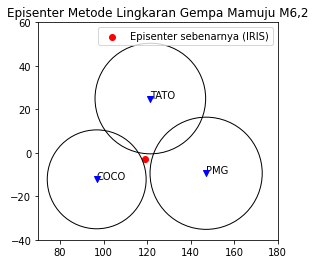

In [196]:
import matplotlib.pyplot as plt

# koordinat stasiun
TATO_coor=(121.50,24.97)
PMG_coor=(147.16,-9.40)
COCO_coor=(96.83,-12.19)

nama_stasiun = ["TATO","PMG","COCO"]

figure, ax = plt.subplots()

ax.set_aspect(1)
for sta,rad,nsta in zip([TATO_coor, PMG_coor, COCO_coor],\
               jarak,nama_stasiun):
    ax.scatter(sta[0],sta[1], zorder=100, marker="v", color="blue")
    draw_circle =plt.Circle(sta, rad, fill=False)
    ax.add_artist(draw_circle)
    ax.annotate(nsta, sta)


ax.set_title('Episenter Metode Lingkaran Gempa Mamuju M6,2')
ax.set_xlim(70,180)
ax.set_ylim(-40,60)
ax.scatter(118.8893,-2.9711,color="red", label="Episenter sebenarnya (IRIS)")
ax.legend()
plt.show()

Hasil pendekatan ini cukup tetapi belum akurat, kita bisa menambah akurasi dengan memanfaatkan Tau P.

### Mencari jarak berdasarkan S-P
#### Pengenalan modul `TauPyModel` dari `obspy`

Sebelum mencari jarak berdasarkan S-P kita akan berkenalan dahulu dengan modul `TauPyModel` dari `obspy`. Modul ini memungkinkan kita mencari nilai waktu tempuh dari gempa ke stasiun dengan lokasi dan kedalaman tertentu. Modul ini berdasarkan algoritma Tau P dan bisa kita aplikasikan dengan berbagai model kecepatan yang sudah ada, kita akan memakai model IASP91. Selain menghitung waktu tempuh, modul juga dapat mengeplot jejak sinar/*raypath*:

In [120]:
from obspy.taup import TauPyModel
model = TauPyModel(model="iasp91")

#contoh menghitung waktu tempuh gempa kedalaman 60 km dengan jarak episenter-stasiun adalah 60 derajat
arrivals = model.get_travel_times(source_depth_in_km=60, #kedalaman dlm km
                                      distance_in_degree=60)# jarak dalam derajat

print(arrivals)

26 arrivals
	P phase arrival at 600.258 seconds
	pP phase arrival at 616.298 seconds
	sP phase arrival at 623.358 seconds
	PcP phase arrival at 645.616 seconds
	PP phase arrival at 733.120 seconds
	ScP phase arrival at 881.182 seconds
	PcS phase arrival at 888.006 seconds
	PKiKP phase arrival at 1024.399 seconds
	pPKiKP phase arrival at 1042.077 seconds
	sPKiKP phase arrival at 1048.763 seconds
	S phase arrival at 1088.878 seconds
	SP phase arrival at 1100.115 seconds
	pS phase arrival at 1107.826 seconds
	PS phase arrival at 1109.778 seconds
	sS phase arrival at 1116.576 seconds
	ScS phase arrival at 1185.125 seconds
	SKiKP phase arrival at 1231.805 seconds
	SS phase arrival at 1327.584 seconds
	PKIKKIKP phase arrival at 1864.119 seconds
	SKIKKIKP phase arrival at 2071.513 seconds
	PKIKKIKS phase arrival at 2078.199 seconds
	SKIKKIKS phase arrival at 2285.426 seconds
	PKIKPPKIKP phase arrival at 2364.644 seconds
	PKPPKP phase arrival at 2375.132 seconds
	PKPPKP phase arrival at 2386.5

untuk mengeplot kita dapat menggunakan `get_raypaths`:

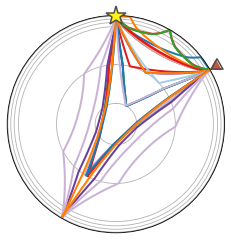

In [119]:
raypaths = model.get_ray_paths(source_depth_in_km=60, #kedalaman dlm km
                                      distance_in_degree=60)# jarak dalam derajat

ax = raypaths.plot_rays()

kita juga dapat membatasi fase apa saja yang akan kita ambil dengan parameter `phase_list`:

In [121]:
arrivals = model.get_travel_times(source_depth_in_km=60, #kedalaman dlm km
                                      distance_in_degree=60,# jarak dalam derajat
                                     phase_list=["P","S"])#daftar fase yang akan diambil

print(arrivals)

2 arrivals
	P phase arrival at 600.258 seconds
	S phase arrival at 1088.878 seconds


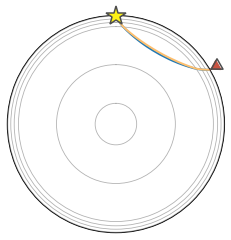

In [122]:
raypaths = model.get_ray_paths(source_depth_in_km=60, #kedalaman dlm km
                               distance_in_degree=60, # jarak dalam derajat
                              phase_list=["P","S"])#daftar fase yang akan diambil

ax = raypaths.plot_rays()

untuk mendapatkan angka waktu tibanya kita menggunakan indeksing dan atribut `.time` dan `.name`, contohnya untuk mendapatkan waktu tiba pertama maka:

In [125]:
first_arrival=arrivals[0]
nama_fase=first_arrival.name
waktu_tiba=first_arrival.time

print("Fase pertama datang {} pada {} sekon".format(nama_fase, waktu_tiba))

Fase pertama datang P pada 600.2579575887129 sekon


Untuk waktu tiba P jelas pertama sehingga kita menggunakan indeks 0 seperti contoh di atas, hanya untuk waktu tiba gelombang S sedikit perlu modifikasi karena bisa saja ada banyak fase P dan S dalam 1 kali kejadian, contoh:

In [156]:
arrivals = model.get_travel_times(source_depth_in_km=10,
                                      distance_in_degree=23.6,
                                      phase_list=["P","S"])
print(arrivals)

8 arrivals
	P phase arrival at 311.128 seconds
	P phase arrival at 311.211 seconds
	P phase arrival at 312.946 seconds
	S phase arrival at 566.326 seconds
	S phase arrival at 568.932 seconds
	S phase arrival at 571.185 seconds
	S phase arrival at 586.578 seconds
	S phase arrival at 586.600 seconds


Pada contoh di atas ada 3 kedatangan gelombang P adn 5 kedatangan gelombang S, bagaimana cara mengambil gelombang S yang pertama? Kita bisa sedikit membuat algoritma:

Mengambil nama-nama fasenya dengan loop:

In [190]:
import numpy as np
phase_names=np.array([arr.name for arr in arrivals])
phase_names

array(['P', 'S'],
      dtype='<U1')

Mencari dimana letak indeks S:

In [158]:
S_indexes=np.where(phase_names=="S")
S_indexes

(array([3, 4, 5, 6, 7]),)

Mengambil indeks S paling pertama sebagai indeks waktu tiba S pertama kali:

In [159]:
S_index=S_indexes[0][0]
S_index

3

Memakai indeks tersebut untuk mengambil S pertama:

In [160]:
Sfirst_arrival=arrivals[S_index]
Snama_fase=Sfirst_arrival.name
Swaktu_tiba=Sfirst_arrival.time

print("Fase S pertama datang {} pada {} sekon".format(Snama_fase, Swaktu_tiba))

Fase S pertama datang S pada 566.3255616737924 sekon


### Memanfaatkan `TauPyModel` untuk mencari jarak

Seperti yang sudah kita bahas di atas, `TauPyModel` berfungsi untuk mencari waktu tempuh gelombang. Dalam algoritma metode lingkaran kita harus melakukan sebaliknya yaitu dari waktu tempuh menjadi jarak. Oleh karena itu kita akan membuat kode singkat untuk membalik algoritmanya, dalam kasus ini kedalaman kita anggap tetap yaitu 10 km.

Pertama kali kita harus membuat *range* tebakan jarak dengan `np.arange`, disini kita menebak bahwa jarak stasiun ke gempa berada di jangkauan 20-30 dengan kelipatan pengecekan adalah 0.1 (20,20.1,20.2,.....,29.9) dengan `distance_list=np.arange(20,30,0.1)`. Kemudian kita membentuk `list` dari waktu S-P masing-masing stasiun:

In [126]:
distance_list=np.arange(20,30,0.1)
station_SP_list=[TATO_SP,PMG_SP,COCO_SP]

Langkah selanjutnya adalah kita mencoba masing-masing jarak dengan `for` *loop* dan menghitung nilai S-P dari `TauPyModel`: `SP_taup=arrivals[-1].time-arrivals[0].time`. Di bawah langkah ini ada kondisional yang menyatakan bila waktu S-P dari `TauPyModel` lebih kecil dari S-P stasiun yang bersangkutan maka nilai tersebut akan dipakai sebagai jarak, tetapi apabila nilai S-P dari `TauPyModel` lebih besar maka nilai jarak tidak diupdate. 


Sebagai bayangan jika kita akan menebak suatu jarak dengan waktu S-P adalah 250 sekon dan kedalaman gempa adalah 10 km dengan jangkauan tebakan kita adalah 22 sampai 25 dengan kelipatan 1:

In [161]:
distance_list=np.arange(22,25,1) #jangkauan tebakan
SP=250 #SP (s)
depth=10 #km

initial_distance=distance_list[0]
for dist in distance_list:
    arrivals = model.get_travel_times(source_depth_in_km=depth,
                                      distance_in_degree=dist,
                                      phase_list=["P","S"])
    # waktu tiba P pasti paling pertama
    P_arrival = arrivals[0].time
    
    # waktu tiba S harus sedikit hati-hati karena bisa ada banyak P dan S
    phase_names=np.array([arr.name for arr in arrivals]) # mengambil nama-nama fase
    S_indexes=np.where(phase_names=="S") #mengambil indeks lokasi S
    S_index=S_indexes[0][0] # mengambil indeks lokasi S pertama kali
    S_arrival = arrivals[S_index].time # waktu tiba S
    
    # menghitung S-P dari TauP IASP91
    SP_taup = S_arrival-P_arrival
    
    if SP_taup<SP: #jika SP_taup < SP observasi maka jarak diupdate
        print("SP taup < SP: {} < {}".format(SP_taup,SP))
        print("Initial distance diupdate: {}".format(initial_distance))
        initial_distance = dist
    else: # jika tidak maka jarak tidak diupdate
        print("SP taup > SP: {} > {}".format(SP_taup,SP))
        print("Initial distance tidak diupdate: {}".format(initial_distance))
        
        
print("Jarak yang terpilih: {}".format(initial_distance))

SP taup < SP: 243.80686273283436 < 250
Initial distance diupdate: 22
SP taup > SP: 251.6500605586528 > 250
Initial distance tidak diupdate: 22
SP taup > SP: 258.02310930613214 > 250
Initial distance tidak diupdate: 22
Jarak yang terpilih: 22


Contoh di atas memperlihatkan bahwa nilai jarak yang terpilih adalah 22 karena saat dicoba nilai SPnya 243, lebih kecil dari 250 atau SP pengamatan. Saat jarak 23 terlihat bahwa nilai sudah lebih besar dari 250 yaitu 251 sehingga jarak 23 seterusnya tidak dipakai. Melihat algoritma di atas masih memiliki kelemahan yaitu bahwa walaupun pada jarak 23 derajat nilai SP>250 tetapi selisihnya hanya sekitar 1,65 detik, jauh lebih kecil dari selisih pada jarak 22 derajat yaitu sekitar 6,2 detik, oleh karena itu kita memperkenalkan kondisional baru:

In [148]:
distance_list=np.arange(22,25,1)
SP=250
depth=10 #km

initial_distance=distance_list[0]

for dist in distance_list:
    arrivals = model.get_travel_times(source_depth_in_km=depth,
                                      distance_in_degree=dist,
                                      phase_list=["P","S"])
    P_arrival = arrivals[0].time
    
    # waktu tiba S harus sedikit hati-hari karena bisa ada banyak P dan S
    phase_names=np.array([arr.name for arr in arrivals]) # mengambil nama-nama fase
    S_indexes=np.where(phase_names=="S") #mengambil indeks lokasi S
    S_index=S_indexes[0][0] # mengambil indeks lokasi S pertama kali
    S_arrival = arrivals[S_index].time # waktu tiba S
    
    SP_taup = S_arrival-P_arrival
    
    if SP_taup<SP:
        initial_distance = dist
        print("SP taup < SP: {} < {}".format(SP_taup,SP))
        print("Initial distance diupdate: {}".format(initial_distance))
        SP_error=abs(SP_taup-SP) #menambah perhitungan SP_error
        
    else:
        SP_error_check = abs(SP_taup-SP)
        if SP_error_check < SP_error: # jika SP_error sekarang < SP_error sebelumnya maka jarak tetap diupdate
            print("SP taup > SP: {} > {}".format(SP_taup,SP))
            print("Tetapi SP_error < SP_error_sebelumnya: {} < {}".format(SP_error_check, SP_error))
            initial_distance = dist
            print("Initial distance diupdate: {}".format(initial_distance))
            
        else:
            print("SP taup > SP: {} > {}".format(SP_taup,SP))
            print("Initial distance tidak diupdate: {}".format(initial_distance))
        
        
print("Jarak yang terpilih: {}".format(initial_distance))

SP taup < SP: 243.80686273283436 < 250
Initial distance diupdate: 22
SP taup > SP: 251.6500605586528 > 250
Tetapi SP_error < SP_error_sebelumnya: 1.6500605586527968 < 6.193137267165639
Initial distance diupdate: 23
SP taup > SP: 258.02310930613214 > 250
Initial distance tidak diupdate: 23
Jarak yang terpilih: 23


Kita sudah mendapatkan jarak yang nilai SPnya lebih mendekati yaitu 23 derajat.

### Implementasi untuk mencari jarak stasiun-gempa yang benar

Untuk mencari jarak yang tepat di setiap stasiun kita menambahkan satu *for* loop lagi dan jangkauan tebakan dari 20 sampai 30 derajat dengan lompatan yang lebih halus yaitu 0,1:

In [167]:
distance_list=np.arange(20,30,0.1)
station_SP_list=[TATO_SP,PMG_SP,COCO_SP]

sta_distance_list=[]
for sta_SP in station_SP_list:
    initial_distance=distance_list[0]
    for dist in distance_list:
        arrivals = model.get_travel_times(source_depth_in_km=depth,
                                          distance_in_degree=dist,
                                          phase_list=["P","S"])
        P_arrival = arrivals[0].time

        # waktu tiba S harus sedikit hati-hari karena bisa ada banyak P dan S
        phase_names=np.array([arr.name for arr in arrivals]) # mengambil nama-nama fase
        S_indexes=np.where(phase_names=="S") #mengambil indeks lokasi S
        S_index=S_indexes[0][0] # mengambil indeks lokasi S pertama kali
        S_arrival = arrivals[S_index].time # waktu tiba S

        SP_taup = S_arrival-P_arrival

        if SP_taup<sta_SP:
            initial_distance = dist
            SP_error=abs(SP_taup-SP) #menambah perhitungan SP_error

        else:
            SP_error_check = abs(SP_taup-SP)
            if SP_error_check < SP_error: # jika SP_error sekarang < SP_error sebelumnya maka jarak tetap diupdate
                initial_distance = dist

    sta_distance_list.append(initial_distance)
sta_distance_list

[27.900000000000112, 28.500000000000121, 23.50000000000005]

dari algoritma di atas kita mendapatkan nilai jarak masing-masing untuk TATO,PMG, dan COCO adalah 27,9,28,5, dan 23,5.

### Mengeplot hasil dengan `matplotlib`

Lingkaran dapat kita plot menggunakan fungsi `plt.Circle` dengan titik tengah berupa koordinat stasiun dan jari-jari berupa jarak yang sebelumnya kita dapatkan:

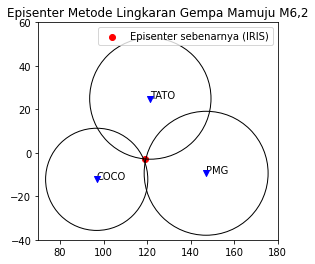

In [187]:
import matplotlib.pyplot as plt

# koordinat stasiun
TATO_coor=(121.50,24.97)
PMG_coor=(147.16,-9.40)
COCO_coor=(96.83,-12.19)

nama_stasiun = ["TATO","PMG","COCO"]

figure, ax = plt.subplots()

ax.set_aspect(1)
for sta,rad,nsta in zip([TATO_coor, PMG_coor, COCO_coor],\
               sta_distance_list,nama_stasiun):
    ax.scatter(sta[0],sta[1], zorder=100, marker="v", color="blue")
    draw_circle =plt.Circle(sta, rad, fill=False)
    ax.add_artist(draw_circle)
    ax.annotate(nsta, sta)


ax.set_title('Episenter Metode Lingkaran Gempa Mamuju M6,2')
ax.set_xlim(70,180)
ax.set_ylim(-40,60)
ax.scatter(118.8893,-2.9711,color="red", label="Episenter sebenarnya (IRIS)")
ax.legend()
plt.show()

### Mengeplot hasil dengan `cartopy` 

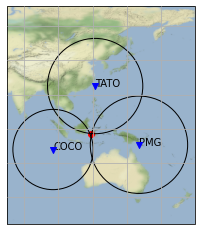

In [189]:
import numpy as np
import cartopy.crs as ccrs
from cartopy.io import srtm
import matplotlib.pyplot as plt
import cartopy.io.img_tiles as cimgt
import cartopy.feature as cfeature

fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((70,180,-40,60))

# Add stamen background
stamen_terrain = cimgt.Stamen('terrain-background') ##maps.stamen.com
ax.add_image(stamen_terrain,2)

ax.set_xlabel("Longitude [deg]")
ax.set_ylabel("Latitude [deg]")

gl = ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False, zorder=11)

gl.xlabels_top = False
gl.ylabels_right = False

for sta,rad,nsta in zip([TATO_coor, PMG_coor, COCO_coor],\
               sta_distance_list,nama_stasiun):
    ax.scatter(sta[0],sta[1], zorder=100, marker="v", color="blue")
    draw_circle =plt.Circle(sta, rad, fill=False)
    ax.add_artist(draw_circle)
    ax.annotate(nsta, sta)


ax.scatter(118.8893,-2.9711,color="red", label="Episenter sebenarnya (IRIS)")

plt.savefig("output/demo_epi.png",dpi=300)

## Referensi

Havskov J., Bormann P., Schweitzer J., 2002, Earthquake location, New Manual on Seismological Observatory Practice: GFZ Potsdam